# Day 2 of IAU MESA hackathon: 
## Angular momentum transport

Summer 2024

This notebook contains the solutions to the plotting exercises of day 2 of the MESA hackathon

In [46]:
# Imports
import numpy as np                  # Import numpy for numerical operations
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import mesa_reader as mr            # Import mesa_reader to read in history/profile files

from astropy import constants as const
import astropy.units as u


In [47]:
######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,25,26
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


# Tasks AM.1: j-profile 

We are going to plot the specific angular momentum (j) profile.

From [Task R.4](Day2_rotation.ipynb), we know that we want profile 1, 157, and 598 (the last one) to represent ZAMS, TAMS, and He exhaustion. 

In [48]:
# Load the log directory
logs = mr.MesaLogDir('rotating_star_proj/LOGS')

# and the relevant profiles
profile_ZAMS        = logs.profile_data(model_number=1)
profile_TAMS        = logs.profile_data(model_number=157)
profile_He_exhaust   = logs.profile_data()# Loads last profile


## Specific angular momentum as a function of the mass coordinate

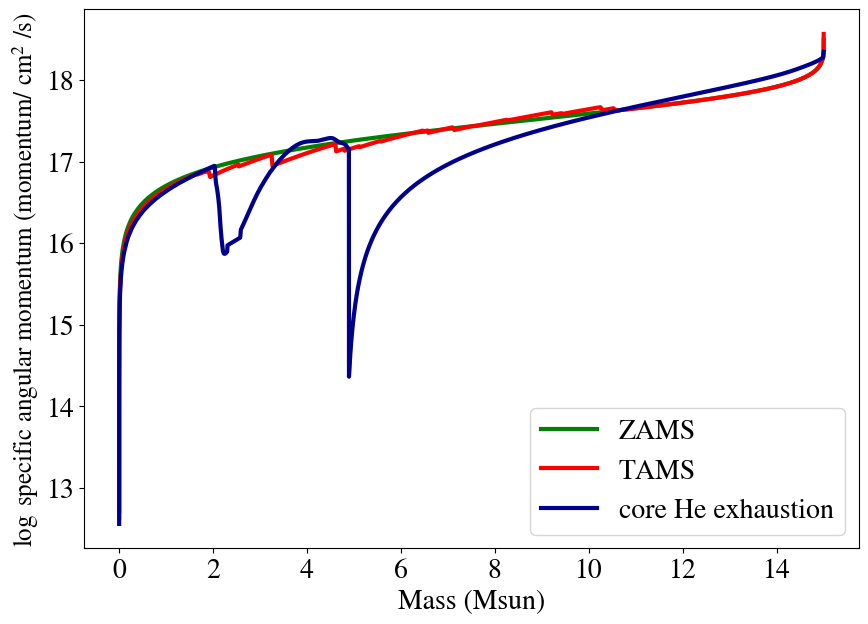

In [49]:
fig, ax = plt.subplots(figsize = (10,7))

plt.plot(profile_ZAMS.mass, profile_ZAMS.log_j_rot, label = 'ZAMS', color = 'green', lw = 3)
plt.plot(profile_TAMS.mass, profile_TAMS.log_j_rot, label = 'TAMS', color = 'red', lw = 3)
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.log_j_rot, label = 'core He exhaustion', color = 'darkblue', lw = 3)

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.legend()
plt.savefig('j_rot.png', bbox_inches = 'tight')
plt.show()



# Tasks AM.2: including Tayler-Spruit Dynamo

To find which profile is closest to TAMS, we will again print out the central He fraction and c_log_eps_burn_cno related to each of the model numbers


In [50]:
# Make a MesaData object for the history file
histdata_AM = mr.MesaData('./rotating_star_proj/LOGS_AM/history.data')
# print(histdata_AM.bulk_names)

# Collect the profile numbers that you have available
model_nums_in_profiles_AM = np.loadtxt('rotating_star_proj/LOGS_AM/profiles.index',
                                    skiprows=1, usecols=0) # first row is header, & we only want the model numbers

# printing out the Center He fraction associated with these model numbers
for mod_num in model_nums_in_profiles_AM:
    print(f'model_number {mod_num}, center_H1 = {histdata_AM.center_h1[histdata_AM.model_number == mod_num]}' )


model_number 1.0, center_H1 = [0.69859376]
model_number 50.0, center_H1 = [0.32863107]
model_number 100.0, center_H1 = [0.00069153]
model_number 150.0, center_H1 = [6.51217323e-07]
model_number 157.0, center_H1 = [8.12283857e-08]
model_number 200.0, center_H1 = [0.]
model_number 250.0, center_H1 = [0.]
model_number 300.0, center_H1 = [0.]
model_number 350.0, center_H1 = [0.]
model_number 400.0, center_H1 = [0.]
model_number 450.0, center_H1 = [5.95424034e-29]
model_number 500.0, center_H1 = [0.]
model_number 515.0, center_H1 = [0.]


We see that we can again use profile number 157 for TAMS. 

In [51]:
########################################
# For the model including Tayler-Spruit dynamo
########################################
# Load the log directory
logs_AM = mr.MesaLogDir('rotating_star_proj/LOGS_AM')

# and the relevant profiles
profile_ZAMS_AM         = logs_AM.profile_data(model_number=1)
profile_TAMS_AM         = logs_AM.profile_data(model_number=200)
profile_He_exhaust_AM   = logs_AM.profile_data()# Loads last profile


########################################
# For the model WITHOUT a B field
########################################
# Load the log directory
logs = mr.MesaLogDir('rotating_star_proj/LOGS')

# and the relevant profiles
profile_ZAMS        = logs.profile_data(model_number=1)
profile_TAMS        = logs.profile_data(model_number=200)
profile_He_exhaust   = logs.profile_data()# Loads last profile


('zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'temperature', 'entropy', 'pressure', 'logPgas', 'pgas_div_ptotal', 'eta', 'mu', 'grada', 'free_e', 'csound', 'v_div_csound', 'eps_grav', 'eps_nuc', 'non_nuc_neu', 'pp', 'cno', 'tri_alpha', 'c_alpha', 'n_alpha', 'o_alpha', 'ne_alpha', 'na_alpha', 'mg_alpha', 'si_alpha', 's_alpha', 'ar_alpha', 'ca_alpha', 'ti_alpha', 'cr_alpha', 'fe_co_ni', 'c12_c12', 'c12_o16', 'o16_o16', 'pnhe4', 'photo', 'ni56_co56', 'co56_fe56', 'other', 'abar', 'ye', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'log_opacity', 'luminosity', 'logL', 'total_energy', 'mlt_mixing_length', 'mlt_mixing_type', 'log_conv_vel', 'gradT', 'gradr', 'grad_temperature', 'grad_density', 'gradL', 'sch_stable', 'ledoux_stable', 'gradT_sub_grada', 'conv_vel_div_csound', 'log_mlt_D_mix', 'gradr_sub_grada',

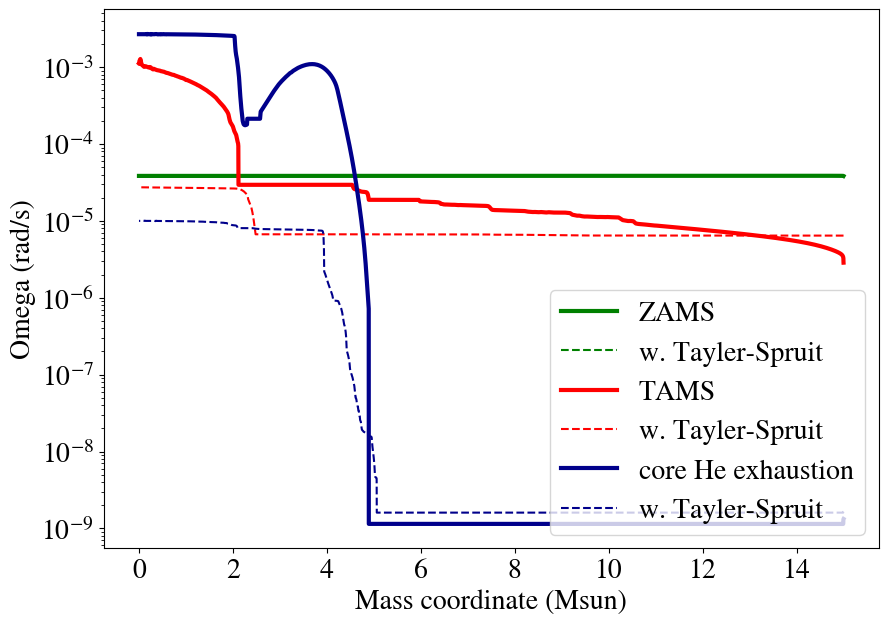

In [52]:
print(profile_ZAMS.bulk_names)
# print(profile_ZAMS.header_names)

fig, ax = plt.subplots(figsize = (10,7))

# ZAMS
plt.plot(profile_ZAMS.mass, profile_ZAMS.omega, label = 'ZAMS', color = 'green', lw = 3)
plt.plot(profile_ZAMS_AM.mass, profile_ZAMS_AM.omega, label = 'w. Tayler-Spruit', color = 'green', ls = '--')

# TAMS
plt.plot(profile_TAMS.mass, profile_TAMS.omega, label = 'TAMS', color = 'red', lw = 3)
plt.plot(profile_TAMS_AM.mass, profile_TAMS_AM.omega, label = 'w. Tayler-Spruit', color = 'red',ls = '--')

# core He exhaustion
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.omega, label = 'core He exhaustion', color = 'darkblue', lw = 3)
plt.plot(profile_He_exhaust_AM.mass, profile_He_exhaust_AM.omega, label = 'w. Tayler-Spruit', color = 'darkblue', ls = '--')

# Plot values
plt.xlabel('Mass coordinate (Msun)')
plt.ylabel('Omega (rad/s)')
plt.legend()
plt.savefig('omega_profile_AM.png', bbox_inches = 'tight')
plt.yscale('log')
plt.show()



## Specific angular momentum as a function of the mass coordinate

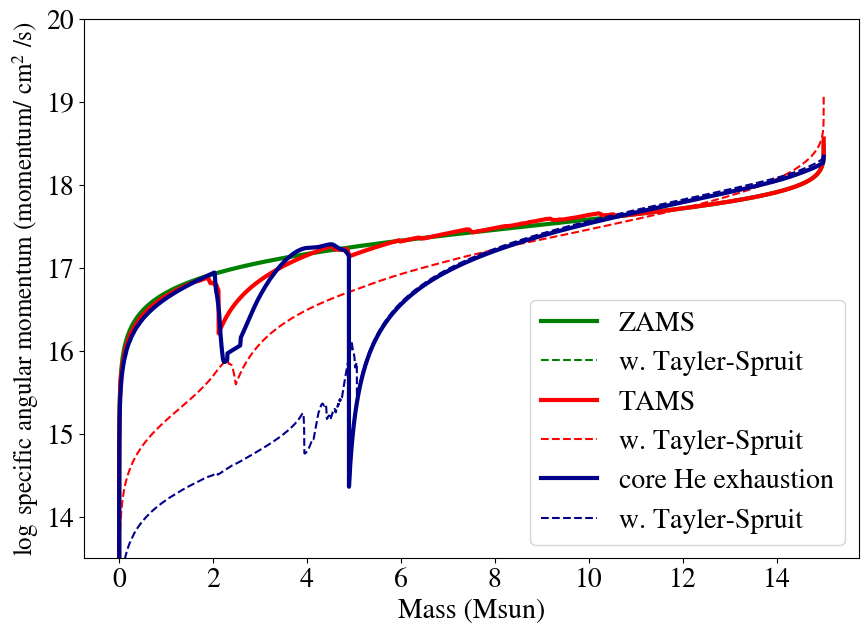

In [53]:
fig, ax = plt.subplots(figsize = (10,7))

# ZAMS
plt.plot(profile_ZAMS.mass, profile_ZAMS.log_j_rot, label = 'ZAMS', color = 'green', lw = 3)
plt.plot(profile_ZAMS_AM.mass, profile_ZAMS_AM.log_j_rot, label = 'w. Tayler-Spruit', color = 'green', ls = '--')

# TAMS
plt.plot(profile_TAMS.mass, profile_TAMS.log_j_rot, label = 'TAMS', color = 'red', lw = 3)
plt.plot(profile_TAMS_AM.mass, profile_TAMS_AM.log_j_rot, label = 'w. Tayler-Spruit', color = 'red',  ls = '--')

# core He exhaustion
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.log_j_rot, label = 'core He exhaustion', color = 'darkblue', lw = 3)
plt.plot(profile_He_exhaust_AM.mass, profile_He_exhaust_AM.log_j_rot, label = 'w. Tayler-Spruit', color = 'darkblue', ls = '--',)

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.ylim(13.5, 20)
plt.legend()
plt.savefig('j_rot_AM.png', bbox_inches = 'tight')
plt.show()



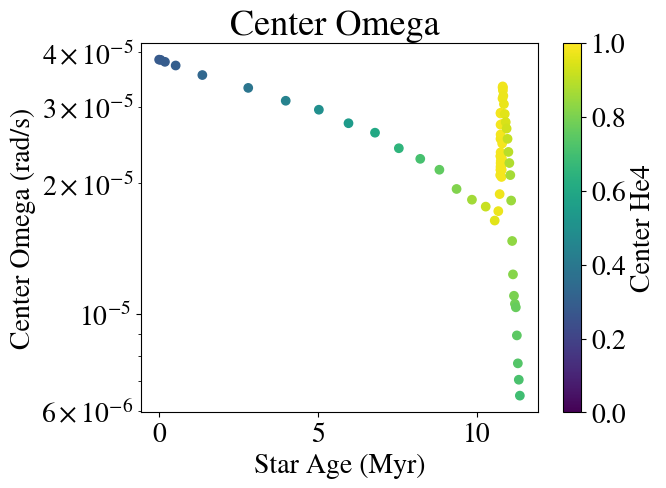

In [44]:
# # # # # # # # # # # # # # # 
plt.title('Center Omega ')
plt.scatter(histdata_AM.star_age/1e6, histdata_AM.center_omega, 
            c = histdata_AM.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Center Omega (rad/s)')
plt.yscale('log')
plt.show()